# Name : Fernando I.A.M.D.
# Index No.: 190172K

## Q2

In [1]:
import cv2
import numpy as np
#import sympy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline 

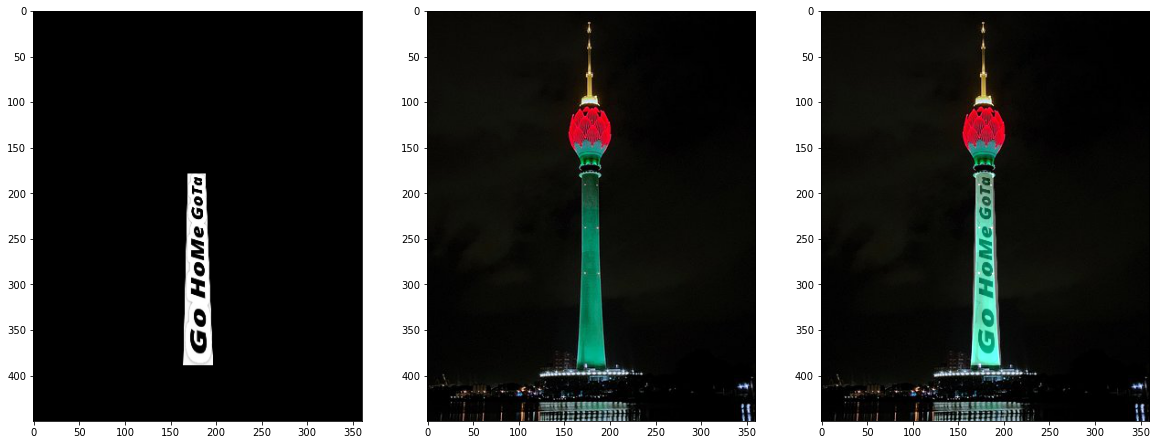

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

N = 4
global n
n = 0
pts_src = np.empty((N, 2))
pts_dst = np.empty((N, 2))

def draw_circle(event, x, y, flags, param):
    global n
    p = param[0]
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(param[1], (x, y), 5, (255, 0, 0), -1)
        p[n] = (x, y)
        n += 1

im_src = cv2.imread('1.jpg')
pts_src = np.array([[0., 0.], [0., 82.], [487., 0.],[487., 82.]])

im_dst = cv2.imread('towering-at-an-imposing.jpg')

im_dst_copy = im_dst.copy()
param = [pts_dst, im_dst_copy]
cv2.namedWindow("Select Points", cv2.WINDOW_AUTOSIZE)
cv2.setMouseCallback('Select Points', draw_circle, param)

while (1):
    cv2.imshow("Select Points", im_dst_copy)
    if n == N:
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

h, status = cv2.findHomography(pts_src, pts_dst)
im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))

im_out1 = cv2.addWeighted(im_dst,1,im_out,.4,0)

fig, ax = plt.subplots(1,3,figsize= (20,10))

ax[0].imshow(cv2.cvtColor(im_out, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(im_out1, cv2.COLOR_BGR2RGB))
plt.show()


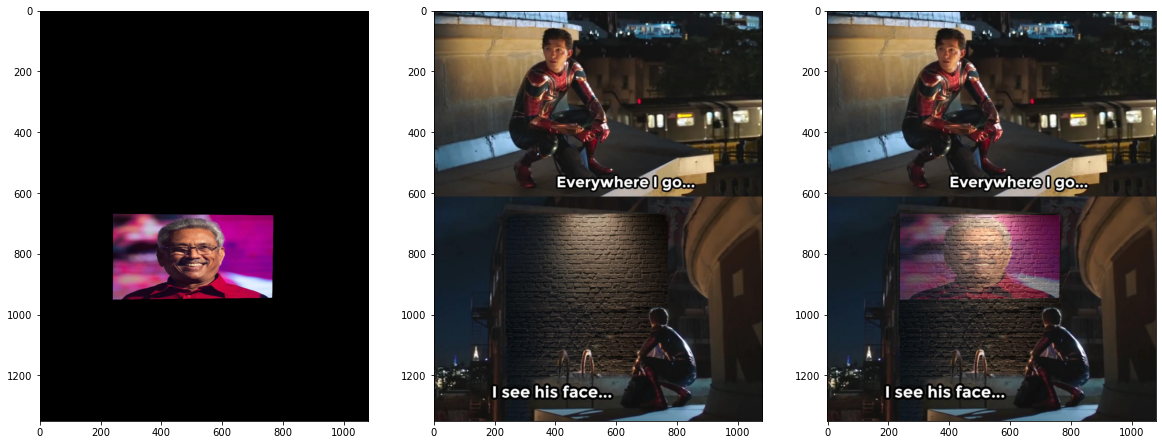

In [2]:


import cv2
import numpy as np
from matplotlib import pyplot as plt

N = 4
global n
n = 0
pts_src = np.empty((N, 2))
pts_dst = np.empty((N, 2))

def draw_circle(event, x, y, flags, param):
    global n
    p = param[0]
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(param[1], (x, y), 5, (255, 0, 0), -1)
        p[n] = (x, y)
        n += 1

im_src = cv2.imread('gotabaya-rajapaksa-controversial-war-hero-who-ended-sri-lankas-3-decade-long-bloody-civil-conflict.jpg')
pts_src = np.array([[0, 0], [1200,0], [0, 900],[1200, 900]])

im_dst = cv2.imread('0542a568280eaff0cd2dfadbfa362ecd.jpg')

im_dst_copy = im_dst.copy()
param = [pts_dst, im_dst_copy]
cv2.namedWindow("Select Points", cv2.WINDOW_AUTOSIZE)
cv2.setMouseCallback('Select Points', draw_circle, param)

while (1):
    cv2.imshow("Select Points", im_dst_copy)
    if n == N:
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

h, status = cv2.findHomography(pts_src, pts_dst)
im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))

im_out1 = cv2.addWeighted(im_dst,1,im_out,.4,0)

fig, ax = plt.subplots(1,3,figsize= (20,10))

ax[0].imshow(cv2.cvtColor(im_out, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(im_out1, cv2.COLOR_BGR2RGB))
plt.show()

## Q3

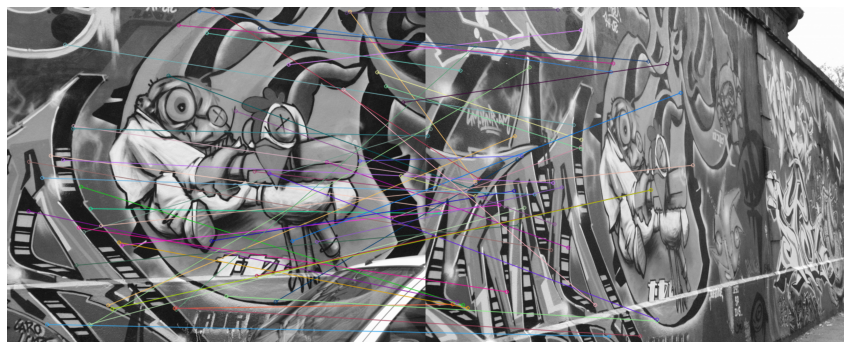

In [36]:
img1 = cv2.imread('img1.ppm')  
img2 = cv2.imread('img5.ppm') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf_match = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf_match.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

match_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(match_img)
plt.show()